<a href="https://colab.research.google.com/github/MikeGordeichik/AImusic/blob/main/Analyse_genres_of_reference_track_with_discogs_effnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install libraries and download models

!pip install -q essentia-tensorflow
!wget -q https://essentia.upf.edu/models/music-style-classification/discogs-effnet/discogs-effnet-bs64-1.json
!wget -q https://essentia.upf.edu/models/music-style-classification/discogs-effnet/discogs-effnet-bs64-1.pb




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.4/291.4 MB 2.6 MB/s eta 0:00:00


In [6]:
#Import dependencies
import json
from essentia.standard import MonoLoader, TensorflowPredictMusiCNN, TensorflowPredictVGGish, TensorflowPredictEffnetDiscogs
import numpy as np
import matplotlib.pyplot as plt



In [3]:
#Load genres
with open('discogs-effnet-bs64-1.json', 'r') as json_file:
    metadata2 = json.load(json_file)
styles = metadata2['classes']



In [4]:
#Load audio file
audio_file = '01 Smells Like Teen Spirit.mp3'
audio = MonoLoader(sampleRate=16000, filename=audio_file)()



In [ ]:
#Activate model
activations2 = TensorflowPredictEffnetDiscogs(graphFilename='discogs-effnet-bs64-1.pb')(audio)



In [8]:
#Find top genres (classes)
n_class = len(styles)
n_patch = len(activations2.T[0])

classes=[]
patches = [[0]*n_patch]*1

for x in range (0,n_class):
  act = 0
  for y in range(0,n_patch):
      act += activations2.T[x,y]
  act =  round(act/n_patch,3)
  if act > 0.1:
    classes.append(metadata2['classes'][x])
    patches.append(activations2.T[x])

del patches[0]




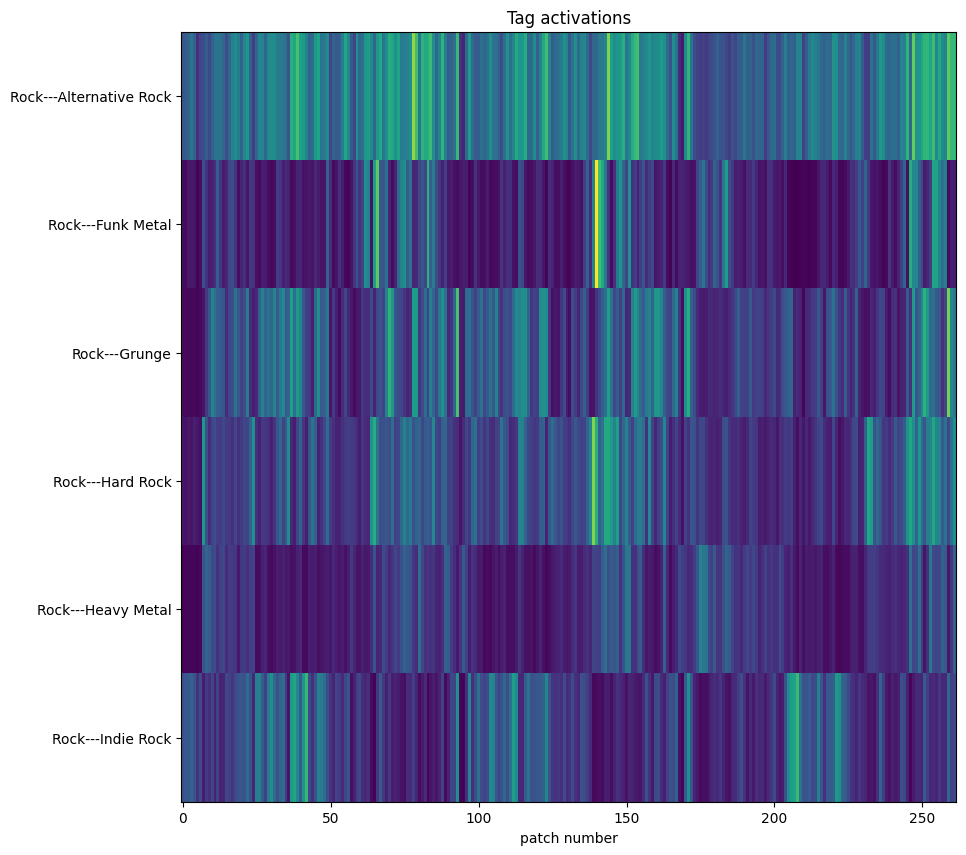

In [9]:
#Plot the chart
ig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.matshow(patches, aspect='auto')

ax.set_yticks(range(len(classes)))
ax.set_yticklabels(classes)
ax.set_xlabel('patch number')
ax.xaxis.set_ticks_position('bottom')
plt.title('Tag activations')
plt.show()